# torchvision.transforms

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from torchvision import transforms as T
from PIL import Image

In [2]:
# https://pytorch.org/vision/stable/transforms.html#transforms-on-torch-tensor-only

In [5]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('/opt/ml/code/data processing/EDA & Preprocessing/wallpaper.jpg')

In [6]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(10, 10))
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

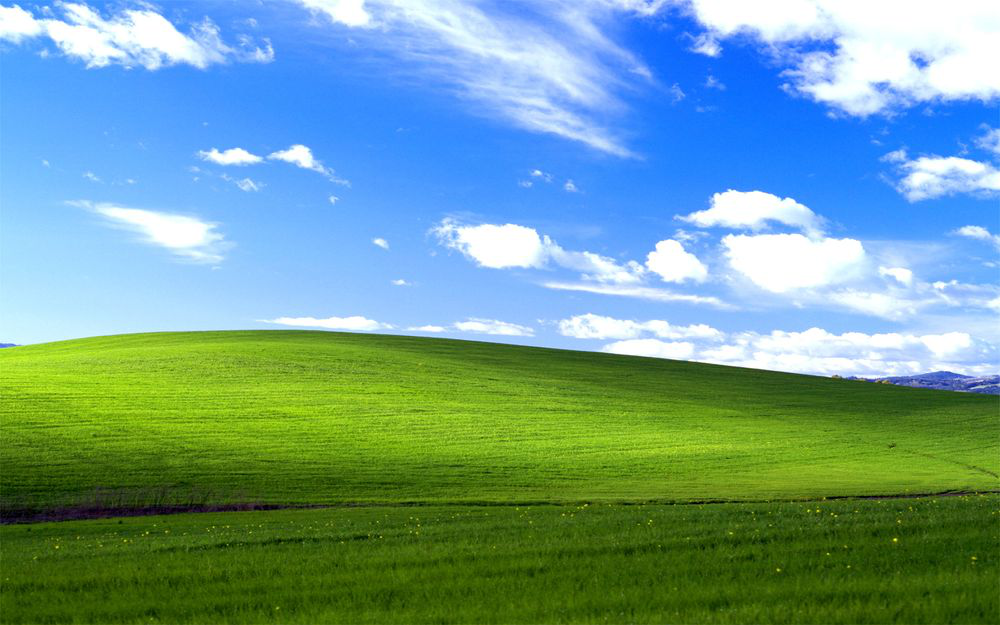

In [7]:
img = Image.open('/opt/ml/code/data processing/EDA & Preprocessing/wallpaper.jpg')
img

## torchvision.transforms.CenterCrop(size)

사진의 앙을 [높이, 가로]에 크기로 자릅니다

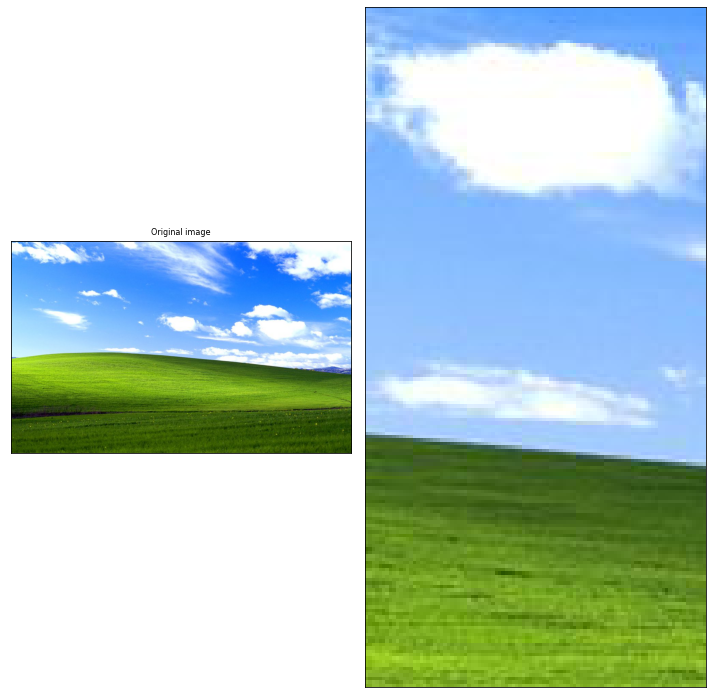

In [8]:
img_centercrop = T.CenterCrop([200, 100])(img)
plot([img_centercrop])

## torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)

밝기(brightness), 대비(contrast), 채도(saturation), 색상(hue)을 랜덤하게 바꿉니다. 
- brightness(float or tuple of python:float (min, max)): [max(0, 1 - brightness), 1 + brightness] or [min, max]. 음수 x
- contrast (float or tuple of python:float (min, max)) : [max(0, 1 - brightness), 1 + brightness] or [min, max]. 음수 x
- saturation (float or tuple of python:float (min, max)) : [max(0, 1 - saturation), 1 + saturation] or [min, max]. 음수 x
- hue (float or tuple of python:float (min, max)) –[-hue, hue] or [min, max]. 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5.

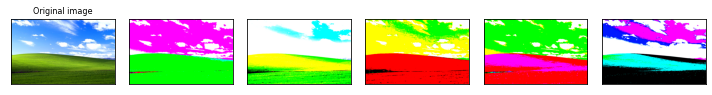

In [9]:
img_colorjitter = [T.ColorJitter(
                                 brightness=(0, 10), 
                                 contrast=(0, 10), 
                                 saturation = (0, 10),
                                 hue = (-0.5, 0.5))(img) for _ in range(5)]
plot(img_colorjitter)

## torchvision.transforms.FiveCrop(size)

이미지의 4개의 꼭짓점과 가운데를 [높이, 가로]로 자릅니다

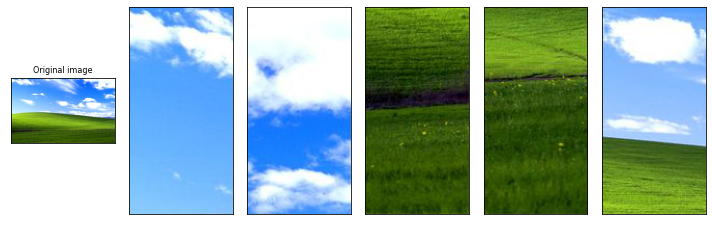

In [10]:
img_fivecrop = T.FiveCrop([200, 100])(img)
plot(list(img_fivecrop))

## torchvision.transforms.Grayscale(num_output_channels=1)

사진을 흑백으로 변환합니다.
- num_output_channels (int) – (1 or 3) : 출력 이미지의 채널 갯수

num_output_channels :  1


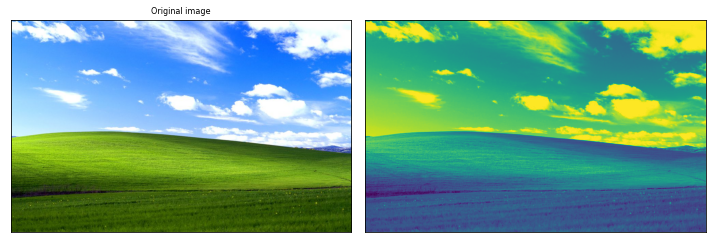

In [11]:
img_grayscale = T.Grayscale()(img)
print('num_output_channels : ', len(T.ToTensor()(img_grayscale)))
plot([img_grayscale])

num_output_channels :  3


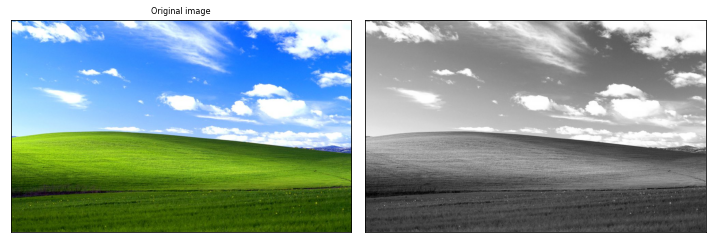

In [12]:
img_grayscale = T.Grayscale(num_output_channels=3)(img)
print('num_output_channels : ', len(T.ToTensor()(img_grayscale)))
plot([img_grayscale])

## torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')

이미지에 패딩을 추가합니다.
- padding(int or sequence) : 테두리에 패딩을 추가합니다. 2개의 숫자면 각각 위 아래, 4개의 숫자면 왼쪽, 오른쪽, 위, 아래 테두리에 추가됩니다.
- fill (number or str or tuple) : 색상을 추가합니다. 색상 이름 혹은 RGB값을 넣습니다
- padding_mode(str) : 패딩의 타입입니다. constant(기본값), edge, relect, symmetric
    - constant : 상수값으로 패딩을 추가합니다.
    - edge : edge의 가장 마지막 값을 패딩으로 추가합니다 *
    - reflect : 엣지의 가장 마지막 값 반복을 제외한 이미지의 반대 부분에 패딩을 추가합니다 *
    - symmetric : 엣지의 가장 마지막 값 반복을 제외한 이미지의 대칭 부분에 패딩을 추가합니다 *

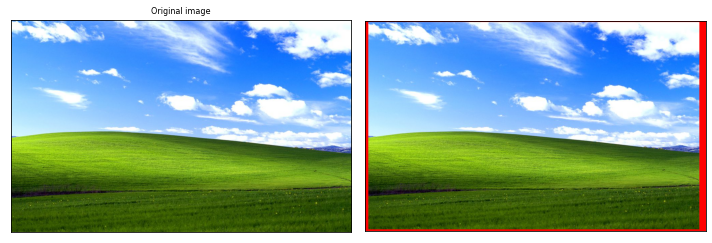

In [13]:
img_pad = T.Pad([10, 3, 20, 5], fill='red', padding_mode='constant')(img)
plot([img_pad])

## torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, interpolation=<InterpolationMode.NEAREST: 'nearest'>, fill=0, fillcolor=None, resample=None)m

랜덤으로 affine을 변경합니다
- degrees (sequence or number) : 각도를 변경합니다
- translate (tuple, optional) :  tuple of maximum absolute fraction for horizontal and vertical translations. * 
- scale (tuple, optional) : tuple 간격에 따라 랜덤하게 크기를 변경합니다
- shear (sequence or number, optional) :  Range of degrees to select from
- interpolation (InterpolationMode) :  Desired interpolation enum defined by torchvision.transforms.InterpolationMode *
- fill (sequence or number) – 픽셀에 변화한 이미지의 밖의 영역의 값을 채웁니다. 0이 기본값 *

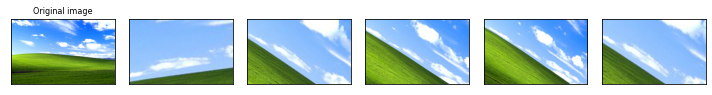

In [14]:
img_randomaffine = [T.RandomAffine(degrees=30, scale=(1, 10))(img) for _ in range(5)]
plot(img_randomaffine)

## torchvision.transforms.RandomApply(transforms, p=0.5)

입력 확률에 따라 랜덤하게 변형합니다.
- transforms (sequence or torch.nn.Module) : list of transformations
- p (float) : 확률

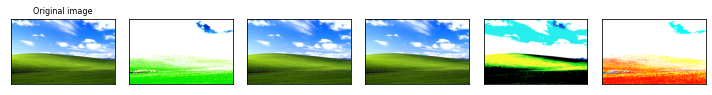

In [15]:
img_randomapply = [T.RandomApply(transforms=[T.ColorJitter(
                                                 brightness=(0, 10), 
                                                 contrast=(0, 10), 
                                                 saturation = (0, 10),
                                                 hue = (-0.5, 0.5))], p=0.5)(img) for _ in range(5)]
plot(img_randomapply)

## torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')

랜덤으로 사진을 자릅니다
- size(sequence or int) : 출력할 이미지의 크기를 정합니다
- padding(int or sequence, optional) : 테두리에 패딩을 추가합니다. 2개의 숫자면 각각 위 아래, 4개의 숫자면 왼쪽, 오른쪽, 위, 아래 테두리에 추가됩니다.
- pad_if_needed (boolean) – It will pad the image if smaller than the desired size to avoid raising an exception. * 
- fill (number or str or tuple) : 색상을 추가합니다. 색상 이름 혹은 RGB값을 넣습니다
- padding_mode(str) : 패딩의 타입입니다. constant(기본값), edge, relect, symmetric
    - constant : 상수값으로 패딩을 추가합니다.
    - edge : edge의 가장 마지막 값을 패딩으로 추가합니다 *
    - reflect : 엣지의 가장 마지막 값 반복을 제외한 이미지의 반대 부분에 패딩을 추가합니다 *
    - symmetric : 엣지의 가장 마지막 값 반복을 제외한 이미지의 대칭 부분에 패딩을 추가합니다 *

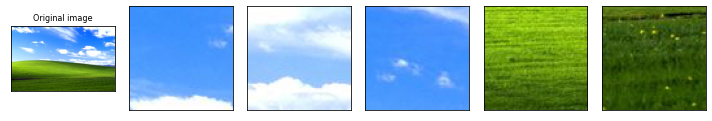

In [16]:
img_randomcrop = [T.RandomCrop(size=(80, 80), padding=3)(img) for _ in range(5)]
plot(img_randomcrop)

## torchvision.transforms.RandomGrayscale(p=0.1)

확률에 따라 랜덤하게 이미지를 흑백으로 변환합니다

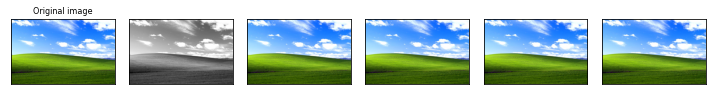

In [17]:
img_randomgrayscale = [T.RandomGrayscale(p=0.3)(img) for _ in range(5)]
plot(img_randomgrayscale)

## torchvision.transforms.RandomHorizontalFlip(p=0.5)

확률에 따라 랜덤하게 이미지를 상하 반전 시킵니다

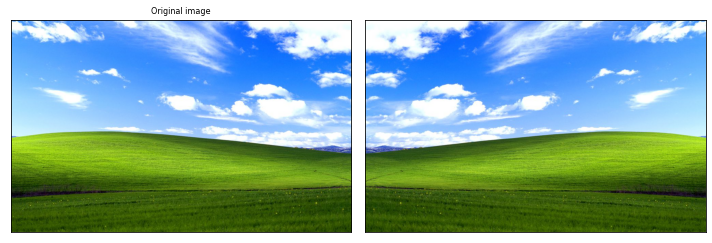

In [18]:
img_randomhorizonalflip = T.RandomHorizontalFlip(p=1)(img) 
plot([img_randomhorizonalflip])

## torchvision.transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, fill=0)

확률에 따라 랜덤하게 이미지를 원근 변화를 합니다
- distortion_scale (float) : 0과 1사이 범위의 왜곡 각도입니다. 기본값은 0.5.
- p (float) – 이미지를 변화시킬 확률입니다. 기본값은 0.5.
- interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.BILINEAR. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR are supported. For backward compatibility integer values (e.g. PIL.Image.NEAREST) are still acceptable. *
- fill (sequence or number) –  픽셀에 변화한 이미지의 밖의 영역의 값을 채웁니다. 0이 기본값 *.

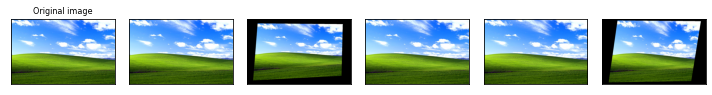

In [19]:
img_randomperspective = [T.RandomPerspective(distortion_scale=0.3, p=0.3)(img) for _ in range(5)]
plot(img_randomperspective)

## torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)

세로*가로 크기 범위 안에서 랜덤하게 변환합니다.
- size (int or sequence): 결과 이미지의 크기
- scale (tuple of python:float) – Specifies the lower and upper bounds for the random area of the crop, before resizing. The scale is defined with respect to the area of the original image. *
- ratio (tuple of python:float) – lower and upper bounds for the random aspect ratio of the crop, before resizing. *
- interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.BILINEAR. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR and InterpolationMode.BICUBIC are supported. For backward compatibility integer values (e.g. PIL.Image.NEAREST) are still acceptable. *

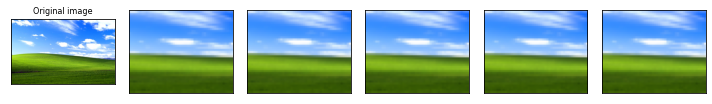

In [20]:
img_randomsizecrop = [T.RandomResizedCrop(size=[40,50], scale=(0.3, 1.0), ratio=(0.1, 0.5))(img) for _ in range(5)]
plot(img_randomsizecrop)

## torchvision.transforms.RandomRotation(degrees, interpolation=<InterpolationMode.NEAREST: 'nearest'>, expand=False, center=None, fill=0, resample=None)

이미지를 랜덤하게 회전합니다
- degrees (sequence or number) – 회전 각도의 범위를 정합니다. 만약 숫자하나라면 (-숫자, +숫자)범위로 들어갑니다
- interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.NEAREST. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR are supported. For backward compatibility integer values (e.g. PIL.Image.NEAREST) are still acceptable. *
- expand (bool, optional) – true인 경우 출력을 확장하여 회전된 전체 이미지를 담을 수 있을 만큼 충분히 크게 만듭니다. false이거나 생략되면 출력 이미지를 입력 이미지와 같은 크기로 만듭니다. 확장 플래그는 중심을 중심으로 회전하고 변환이 없다고 가정합니다.
- center (sequence, optional) – 회전 중심을 정합니다. 기본은 사진의 가운데 입니다.
- fill (sequence or number) – Pixel fill value for the area outside the rotated image. Default is 0. If given a number, the value is used for all bands respectively. *


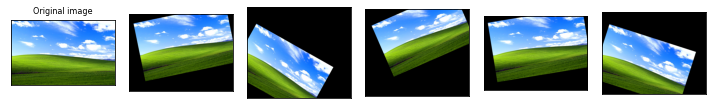

In [21]:
img_randomrotaion = [T.RandomRotation(degrees=30, expand=True, center=[20, 30])(img) for _ in range(5)]
plot(img_randomrotaion)

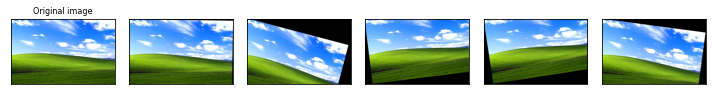

In [22]:
img_randomrotaion = [T.RandomRotation(degrees=30, expand=False, center=[20, 30])(img) for _ in range(5)]
plot(img_randomrotaion)

## torchvision.transforms.RandomVerticalFlip(p=0.5)

랜덤하게 수직으로 뒤집어 변형합니다
- p : 뒤집을 확률

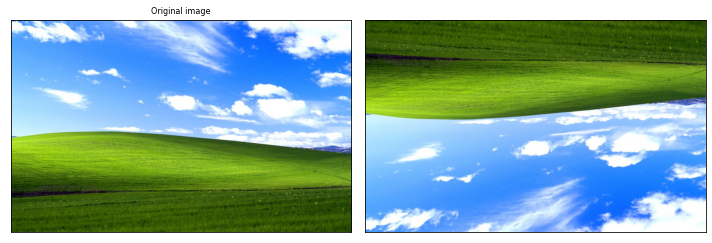

In [23]:
img_randomverticalflip = T.RandomVerticalFlip(p=1)(img)
plot([img_randomverticalflip])

## torchvision.transforms.Resize(size, interpolation=<InterpolationMode.BILINEAR: 'bilinear'>, max_size=None, antialias=None)

이미지의 사이즈를 조절합니다
- size (sequence or int) : 출력 크기를 정합니다. 만약 세로가 가로보다 긴 경우, (size * height / width, size)로 재조정됩니다
- interpolation (InterpolationMode) – Desired interpolation enum defined by torchvision.transforms.InterpolationMode. Default is InterpolationMode.BILINEAR. If input is Tensor, only InterpolationMode.NEAREST, InterpolationMode.BILINEAR and InterpolationMode.BICUBIC are supported. For backward compatibility integer values (e.g. PIL.Image.NEAREST) are still acceptable. *
- max_size (int, optional) : 사이즈가 재조정된 이미지의 가장 긴 가장자리의 최댓값을 정합니다 *
- antialias  (bool, optional) – 안티 에일리어스(계단현상)을 설정합니다

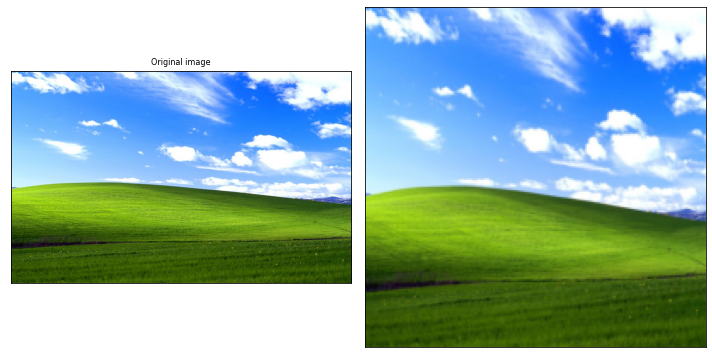

In [24]:
img_resize = T.Resize(size=[200, 200])(img)
plot([img_resize])

## torchvision.transforms.TenCrop(size, vertical_flip=False)

이미지를 4개의 꼭지점과 중간, 그리고 뒤집힌 경우도 포함하여 자릅니다.
- size (sequence or int) – 출력 이미지의 사이즈를 정합니다
- vertical_flip (bool) – 좌우 반전 대신 위 아래 반전을 사용합니다

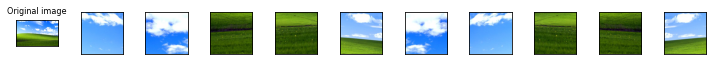

In [25]:
img_tencrop = T.TenCrop(size=[200, 200])(img)
plot(list(img_tencrop))

## torchvision.transforms.GaussianBlur(kernel_size, sigma=(0.1, 2.0))

가우시안 블러를 랜덤으로 이미지에 적용합니다
- kernel_size (int or sequence) – 가우시안 커널의 크기
- sigma (float or tuple of python:float (min, max)) – 커널을 만들 때 사용되는 표준편차를 정합니다

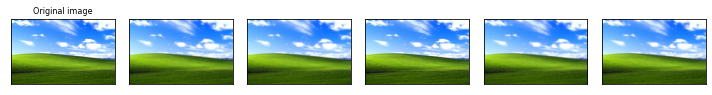

In [26]:
img_gaussianblur = [T.GaussianBlur(kernel_size=13, sigma=(0.1, 10))(img) for _ in range(5)]
plot(img_gaussianblur)

확률에 따라 주어진 이미지를 랜덤하게 히스토그램 균등화 합니다

# Transforms on PIL Image only

## torchvision.transforms.RandomChoice(transforms, p=None)

transformation을 랜덤하게 하나를 선택하여 적용합니다

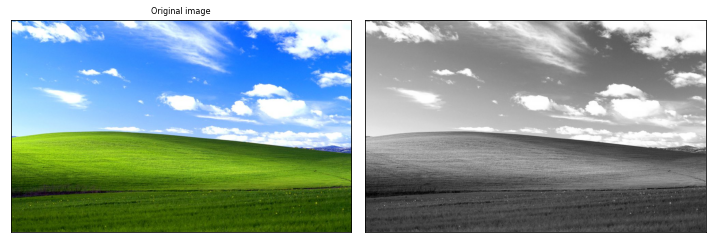

In [38]:
img_randomchoice = T.RandomChoice(transforms=
                                  [T.Grayscale(num_output_channels=3), 
                                  T.CenterCrop([200, 100])])(img)
plot([img_randomchoice])

## torchvision.transforms.RandomOrder(transforms)

랜덤한 순서로 transformations을 적용합니다

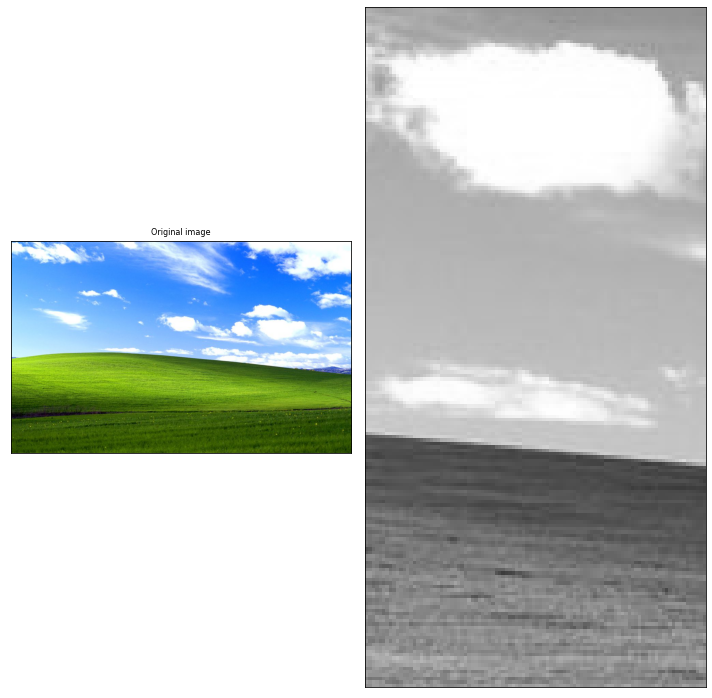

In [39]:
img_randomorder = T.RandomOrder(transforms=
                                  [T.Grayscale(num_output_channels=3), 
                                  T.CenterCrop([200, 100])])(img)
plot([img_randomorder])

# Transforms on torch.*Tensor only

In [40]:
from torchvision.transforms.functional import to_pil_image

In [41]:
img_tensor = T.ToTensor()(img)
img_tensor

tensor([[[0.3059, 0.2980, 0.2863,  ..., 1.0000, 1.0000, 1.0000],
         [0.2745, 0.2706, 0.2667,  ..., 1.0000, 1.0000, 1.0000],
         [0.3098, 0.2941, 0.2902,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.2000, 0.1490, 0.1294,  ..., 0.1333, 0.1412, 0.1529],
         [0.2275, 0.1804, 0.1608,  ..., 0.1294, 0.1412, 0.1529],
         [0.2627, 0.2392, 0.2353,  ..., 0.1451, 0.1647, 0.1725]],

        [[0.6196, 0.6157, 0.6039,  ..., 1.0000, 1.0000, 1.0000],
         [0.5882, 0.5843, 0.5843,  ..., 1.0000, 1.0000, 1.0000],
         [0.6196, 0.6039, 0.6039,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3216, 0.2706, 0.2510,  ..., 0.2627, 0.2706, 0.2824],
         [0.3490, 0.3020, 0.2824,  ..., 0.2588, 0.2706, 0.2824],
         [0.3961, 0.3725, 0.3686,  ..., 0.2745, 0.2941, 0.3020]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9922, 0.9765, 0.9843,  ..., 1.0000, 1.0000, 1.

## torchvision.transforms.LinearTransformation(transformation_matrix, mean_vector)

정사각형 변환 행렬과 오프라인에서 계산된 mean_vector를 사용하여 텐서 이미지 변환합니다 *
- transformation_matrix (Tensor) – tensor [D x D], D = C x H x W
- mean_vector (Tensor) – tensor [D], D = C x H x W

## torchvision.transforms.Normalize(mean, std, inplace=False)

평균 및 표준 편차로 텐서 이미지 정규화합니다
- mean (sequence) – 각 채널의 평균 시퀀스
- std (sequence) – 각 채널의 표준편차 시퀀스
- inplace (bool,optional) – Bool to make this operation in-place. *

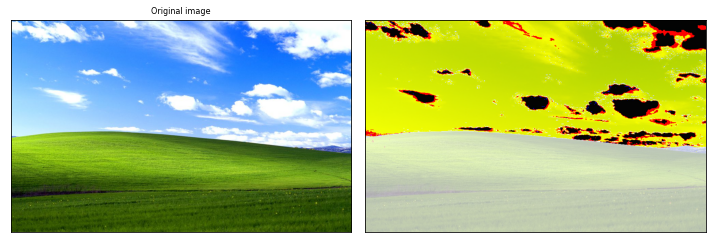

In [42]:
img_normalize = T.Normalize(mean=10, std=3)(img_tensor)
plot([to_pil_image(img_normalize)])

## torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)

텐서 이미지에서 랜덤으로 사각 영역을 선택하고 지웁니다.
- p : 지울 확률
- scale : 이미지에서 지울 크기
- ratio : 지울 영역의 비율
- value : erasing value. 기본값은. 정수형이라면 모든 픽셀을 지웁니다. 길이가 3인 튜플이라면, R, G, B 채널 각각에서 지웁니다. 'random' 이라면 랜덤하게 지웁니다
- inplace : boolean to make this transform inplace. Default set to False.

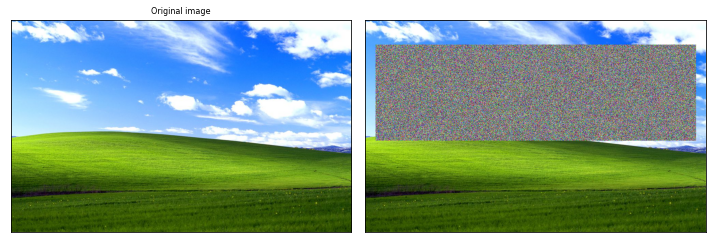

In [43]:
img_randomerasing = T.RandomErasing(p=1, scale=(0.1, 0.5), ratio=(0.3, 0.3), value='random')(img_tensor)
plot([to_pil_image(img_randomerasing)])

## torchvision.transforms.ConvertImageDtype(dtype: torch.dtype)

주어진 dtype에 따라 텐서이미지를 변환합니다.
- dtype (torch.dpython:type) : 출력의 타입을 정합니다

# Conversion Transforms

## torchvision.transforms.ToTensor

PIL 이미지를 tensor로 변환합니다

## torchvision.transforms.ToPILImage(mode=None)

텐서나 ndarray를 PIL 이미지로 변환합니다
- mode (PIL.Image mode) : color space and pixel depth of input data (optional) *

# Generic Transform

## torchvision.transforms.Lambda(lambd)

사용자가 정의한 람다를 transforms으로 적용합니다
- lambd (function) : 람다 함수